# Exploratory Data Analysis 

### Importing python modules for data analysis and visualization

In [3]:
import numpy as np # manipulation of arrays
import pandas as pd # manipulating dataframes
import matplotlib.pyplot as plt # data visualisation
import seaborn as sb # data visualisation,it is based on plt

In [4]:
#ignoring warnings that may arise
import warnings
warnings.filterwarnings('ignore')

### Importing the datasets

In [5]:
!ls ../input/ace-class-assignment/

# reading in the data
data = pd.read_csv('../input/ace-class-assignment/AMP_TrainSet.csv')
new = pd.read_csv('../input/ace-class-assignment/Test.csv')

AMP_TrainSet.csv  Test.csv


### Checking the dimensions of the data as well as the datatype of each column

In [6]:
# checking dimensions of the datasets
data.shape, new.shape

((3038, 12), (758, 11))

In [7]:
# checking the datatypes of the variables
data.dtypes, new.dtypes

(FULL_Charge           float64
 FULL_AcidicMolPerc    float64
 FULL_AURR980107       float64
 FULL_DAYM780201       float64
 FULL_GEOR030101       float64
 FULL_OOBM850104       float64
 NT_EFC195               int64
 AS_MeanAmphiMoment    float64
 AS_DAYM780201         float64
 AS_FUKS010112         float64
 CT_RACS820104         float64
 CLASS                   int64
 dtype: object,
 FULL_Charge           float64
 FULL_AcidicMolPerc    float64
 FULL_AURR980107       float64
 FULL_DAYM780201       float64
 FULL_GEOR030101       float64
 FULL_OOBM850104       float64
 NT_EFC195               int64
 AS_MeanAmphiMoment    float64
 AS_DAYM780201         float64
 AS_FUKS010112         float64
 CT_RACS820104         float64
 dtype: object)

All the values in all the variables exists as either floats or integers.

Proceeding to work with the training dataset to build the classifier

In [8]:
# getting the descriptive statistics of the train dataset such as arithmetic mean, 
# standard deviation, quartiles and number of non-NA values in each column 
data.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [9]:
# checking the proprotions of classses
data.groupby('CLASS').size()

CLASS
0    1519
1    1519
dtype: int64

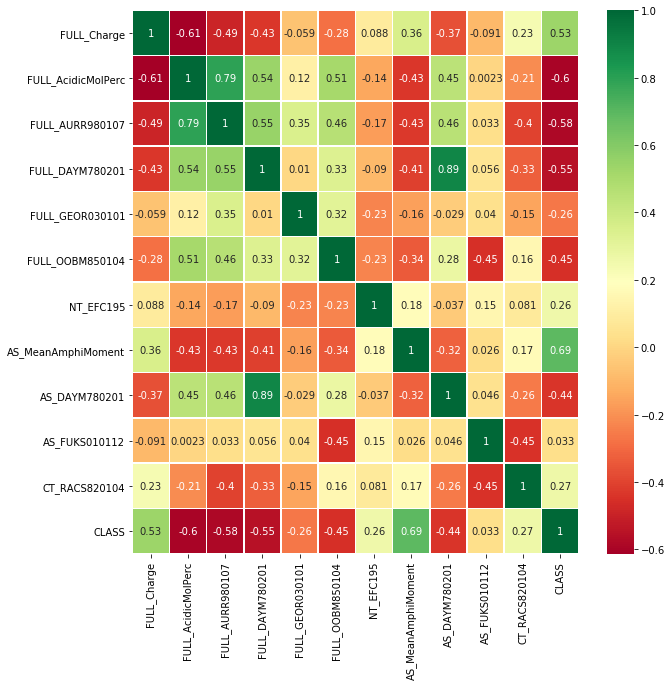

In [10]:
# obtaining pairwise correlation values for the variables in the train dataset
# use this resource to understand the output https://realpython.com/numpy-scipy-pandas-correlation-python/#pearson-correlation-coefficient
pearsoncorr = data.corr(method='pearson')

# visualizing the correlation matrix as a heatmap to make interpretation easier
plt.figure(figsize=(10,10))
top_corr = pearsoncorr.index
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=0.5)

Looking at the last row, FULL_Charge and AS_MeanAmphiMoment have the highest positive correlation values with CLASS whereas second,third and fourth variables have the most negative correlation values.

You can get the p-values associated with the correlation values using the code below.

`from scipy.stats import pearsonr`

`data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(train.columns))`

In this example, all values were too low to be informative

In [11]:
# using a scatter plot matrix to visualise correlations
# plt.figure(figsize=(60,60))
# sb.pairplot(data)

Some variables are significantly correlated with each other which raises the problem of multicollinearity (variables are correlated with each other as well as with the response variable).
These variables are Full_Charge, FULL_AcidicMolPer, FULL_AURR980107,...

Variables that require further investigation - NT_EFC195, AS_MeanAmphiMoment

In [12]:
len(data['AS_MeanAmphiMoment'].unique()), data['NT_EFC195'].unique()

#this confirms that NT_EFC195 is a categorical variable

(2830, array([0, 1]))

In [13]:
data[['CLASS','NT_EFC195']].head() #NT_EFC195 assumes both values irrespective of class


,CLASS,NT_EFC195
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [14]:
# getting the associated p-values. The value of 1 at the bottom should be ignored 
from scipy.stats import pearsonr
data.corr(method=lambda x, y: pearsonr(x, y)[1])['CLASS']

FULL_Charge           3.404241e-224
FULL_AcidicMolPerc    4.220004e-295
FULL_AURR980107       1.887905e-277
FULL_DAYM780201       6.997934e-245
FULL_GEOR030101        2.669597e-48
FULL_OOBM850104       7.441087e-154
NT_EFC195              2.189203e-48
AS_MeanAmphiMoment     0.000000e+00
AS_DAYM780201         4.911002e-142
AS_FUKS010112          6.540694e-02
CT_RACS820104          5.329249e-51
CLASS                  1.000000e+00
Name: CLASS, dtype: float64

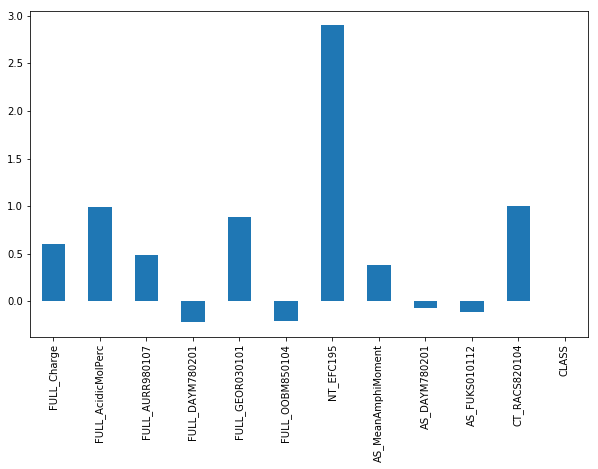

In [15]:
# checking the distribution and skewness of variables
plt.figure(figsize=(10,6))
data.skew().plot(kind='bar')

In [16]:
data.groupby('NT_EFC195').size() # majority of the instances are of Class 0.

NT_EFC195
0    2769
1     269
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca133b2be0>,
      dtype=object)

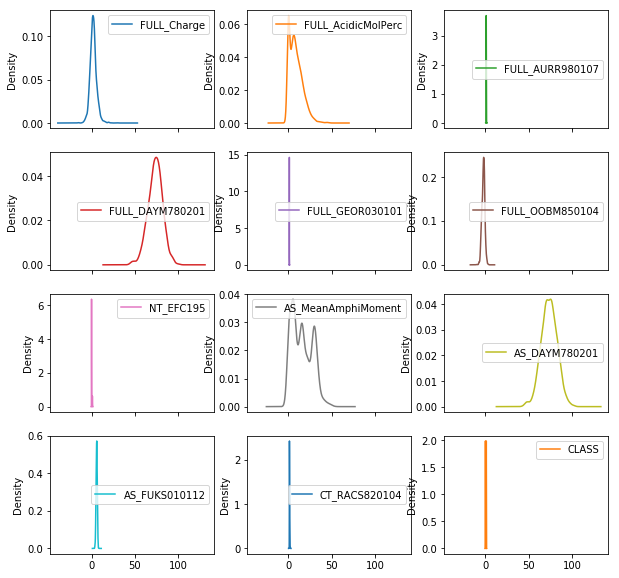

In [17]:
data.plot(kind='density', subplots=True, layout=(4,3), figsize=(10,10))

Values for AS_FUK010112, CT_RACS820104,FULL_GEOR030101 and FULL_AURR980107 lie close to zero compared to the rest of the variables.

Tranformation possibilities
* using the minimum and maximum scaler
* standardisation

### Data transformation

In [18]:
# converting Pandas dataframe to ndArray
dataArray = data.to_numpy()

# seperating the predictor and response variables
target = dataArray[:,11]
predictors = dataArray[:,0:11]

In [19]:
# using minMaxScaler to set all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledPredictors = scaler.fit_transform(predictors)
                        

# using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler().fit(predictors)
standardizedPredictors = scaler1.transform(predictors)
                        


### Feature selection

In [20]:
# using univariate statistics F-test as an alternative to chi-squared test (some values are zero and chi2 returns an error)

# untransformed data
from sklearn.feature_selection import SelectKBest, f_classif
bestFeatures = SelectKBest(score_func=f_classif, k=7)
fit = bestFeatures.fit(predictors, target)

scores = pd.DataFrame(fit.scores_) 
pvalues = pd.DataFrame(fit.pvalues_)
columns = pd.DataFrame(data.columns[0:11])

featureValues = pd.concat([columns,scores, pvalues,], axis=1) # concatenating dataframes
featureValues.columns = ['predictor', 'score', 'pvalue'] # naming the columns

print(featureValues.nlargest(7, 'score'))

            predictor        score         pvalue
7  AS_MeanAmphiMoment  2813.868178   0.000000e+00
1  FULL_AcidicMolPerc  1697.249565  4.220004e-295
2     FULL_AURR980107  1572.280677  1.887905e-277
3     FULL_DAYM780201  1350.300743  6.997934e-245
0         FULL_Charge  1214.902838  3.404241e-224
5     FULL_OOBM850104   785.124798  7.441087e-154
8       AS_DAYM780201   717.317408  4.911002e-142


In [21]:
# checking the transformed data

# rescaledPredictors
reBestFeatures = SelectKBest(score_func=f_classif, k=7)
reFit = reBestFeatures.fit(rescaledPredictors, target)

reScores = pd.DataFrame(reFit.scores_) 
rePvalues = pd.DataFrame(reFit.pvalues_)
reColumns = pd.DataFrame(data.columns[0:11])

reFeatureValues = pd.concat([reColumns,reScores, rePvalues,], axis=1) # concatenating dataframes
reFeatureValues.columns = ['re_predictor', 're_score', 're_pvalue'] # naming the columns



# standardizedPredictors
stBestFeatures = SelectKBest(score_func=f_classif, k=7)
stFit = stBestFeatures.fit(standardizedPredictors, target)

stScores = pd.DataFrame(stFit.scores_) 
stPvalues = pd.DataFrame(stFit.pvalues_)
stColumns = pd.DataFrame(data.columns[0:11])

stFeatureValues = pd.concat([stColumns,stScores, stPvalues,], axis=1) # concatenating dataframes
stFeatureValues.columns = ['st_predictor', 'st_score', 'st_pvalue'] # naming the columns

print(reFeatureValues.nlargest(7, 're_score')), print(stFeatureValues.nlargest(7, 'st_score'))

         re_predictor     re_score      re_pvalue
7  AS_MeanAmphiMoment  2813.868178   0.000000e+00
1  FULL_AcidicMolPerc  1697.249565  4.220004e-295
2     FULL_AURR980107  1572.280677  1.887905e-277
3     FULL_DAYM780201  1350.300743  6.997934e-245
0         FULL_Charge  1214.902838  3.404241e-224
5     FULL_OOBM850104   785.124798  7.441087e-154
8       AS_DAYM780201   717.317408  4.911002e-142
         st_predictor     st_score      st_pvalue
7  AS_MeanAmphiMoment  2813.868178   0.000000e+00
1  FULL_AcidicMolPerc  1697.249565  4.220004e-295
2     FULL_AURR980107  1572.280677  1.887905e-277
3     FULL_DAYM780201  1350.300743  6.997934e-245
0         FULL_Charge  1214.902838  3.404241e-224
5     FULL_OOBM850104   785.124798  7.441087e-154
8       AS_DAYM780201   717.317408  4.911002e-142


(None, None)

[0.07902812 0.14524468 0.09617523 0.09684783 0.05136757 0.07509526
 0.03643717 0.28509498 0.05087749 0.03093695 0.05289472]


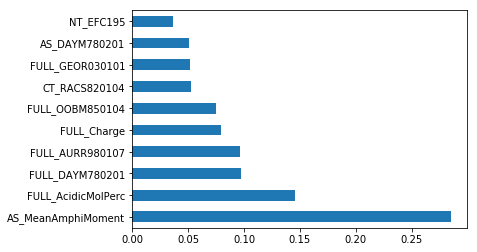

In [22]:
# using feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(predictors, target)
print(model.feature_importances_)

# visualising feature importance
importances = pd.Series(model.feature_importances_, index=data.columns[0:11])
importances.nlargest(10).plot(kind='barh')
plt.show()

### Building the classification model

In [23]:
# Splitting the data_one dataset into training and test datasets and using a logit function to classify instances
from sklearn.model_selection import train_test_split # random split
from sklearn.linear_model import LogisticRegression # all machine learning models in Python are implemented as classes
p_train, p_test, t_train, t_test = train_test_split(predictors, target, 
                                                    test_size=0.30,random_state=42)

logit = LogisticRegression() # making instance of model

# fitting the model on untransformed data
logit.fit(p_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Measuring model performance

We can measure the performance of a classification problem using precison, F1 Score, ROC curve


In [24]:
# predict on test data
predictions = logit.predict(p_test) 

Text(0.5, 15.0, 'Predicted label')

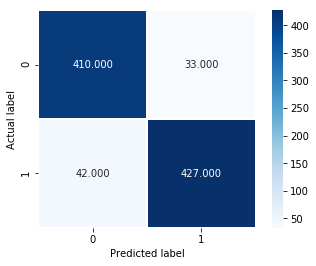

In [25]:
# the confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(t_test, predictions)
cm
sb.heatmap(cm, annot=True, fmt='.3f', linewidths=.5,
          square=True, cmap='Blues') 
plt.ylabel('Actual label'); plt.xlabel('Predicted label')


In [26]:
# performance metrics
print("Accuracy: ",metrics.accuracy_score(t_test, predictions)*100)
print("Precision: ",metrics.precision_score(t_test, predictions)*100)
print("Recall: ",metrics.recall_score(t_test, predictions)*100)

from sklearn.metrics import matthews_corrcoef
print('MCC: ',matthews_corrcoef(t_test, predictions)) # takes into account true and false positives and negatives, higher values are better
# not affected by unbalanced classes




Accuracy:  91.77631578947368
Precision:  92.82608695652173
Recall:  91.04477611940298
MCC:  0.8356480321235562


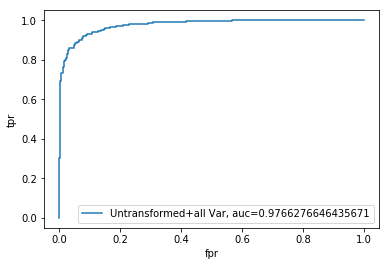

In [27]:
# ROC curve of true positive rate against false positive rate
# shows tradeoff between sensitivy and specificity

pred_probs = logit.predict_proba(p_test)[::,1] # start=0, stop=size of dimension, step=1
fpr, tpr,_ = metrics.roc_curve(t_test, pred_probs)
auc = metrics.roc_auc_score(t_test, pred_probs)
plt.plot(fpr, tpr, label = 'Untransformed+all Var, auc='+ str(auc))
plt.legend(loc=4)
plt.ylabel('tpr'), plt.xlabel('fpr')
plt.show()

In [28]:
# performance on new data
new_pred = logit.predict(new.values)

pred_df = pd.DataFrame(new_pred) 
pred_df.columns=["CLASS"]
pred_df.index.name="Index" 
pred_df["CLASS"] = pred_df["CLASS"].map({0:'False',1.0:'True'})

#csv file output
pred_df.to_csv("ilujumba.csv") 
print(pred_df['CLASS'].unique())

#printing the numbers of False and True
print(pred_df.groupby('CLASS').size()[0].sum())
print(pred_df.groupby('CLASS').size()[1].sum())

['False' 'True']
386
372


#### Logistic regression on scaled data

In [29]:
p1_train, p1_test, t1_train, t1_test = train_test_split(rescaledPredictors, target, 
                                                        test_size=0.30,random_state=42)

logit1 = LogisticRegression() # making instance of model

# fitting the model on rescaled data
logit1.fit(p1_train, t1_train)

# predict on test data
predictions1 = logit1.predict(p1_test)

# performance metrics
print("Accuracy: ",metrics.accuracy_score(t1_test, predictions1)*100)
print("Precision: ",metrics.precision_score(t1_test, predictions1)*100)
print("Recall: ",metrics.recall_score(t1_test, predictions1)*100)

from sklearn.metrics import matthews_corrcoef
print('MCC: ',matthews_corrcoef(t1_test, predictions1))

# rescaling new data
newArray = new.to_numpy()
rescaledNew = scaler.fit_transform(newArray)


Accuracy:  91.66666666666666
Precision:  92.81045751633987
Recall:  90.8315565031983
MCC:  0.8335025900424667


In [30]:
# performance on new data (rescaled)
new_pred1 = logit1.predict(rescaledNew)

pred_df1 = pd.DataFrame(new_pred1) 
pred_df1.columns=["CLASS"]
pred_df1.index.name="Index" 
pred_df1["CLASS"] = pred_df1["CLASS"].map({0:'False',1.0:'True'})

#csv file output
pred_df1.to_csv("ilujumba1.csv") 
print(pred_df1['CLASS'].unique())

#printing the numbers of False and True
print(pred_df1.groupby('CLASS').size()[0].sum())
print(pred_df1.groupby('CLASS').size()[1].sum())

['False' 'True']
378
380


#### Logistic regression on standardized data

In [31]:
p2_train, p2_test, t2_train, t2_test = train_test_split(standardizedPredictors, target, 
                                                        test_size=0.30,random_state=42)

logit2 = LogisticRegression() # making instance of model

# fitting the model on rescaled data
logit2.fit(p2_train, t2_train)

# predict on test data
predictions2 = logit2.predict(p2_test)

# performance metrics
print("Accuracy: ",metrics.accuracy_score(t2_test, predictions2)*100)
print("Precision: ",metrics.precision_score(t2_test, predictions2)*100)
print("Recall: ",metrics.recall_score(t2_test, predictions2)*100)
print('MCC: ',matthews_corrcoef(t2_test, predictions2))

# standardizing new data
standardizedNew = scaler1.transform(newArray)

# performance on new data (standaridized)
new_pred2 = logit2.predict(standardizedNew)

pred_df2 = pd.DataFrame(new_pred2) 
pred_df2.columns=["CLASS"]
pred_df2.index.name="Index" 
pred_df2["CLASS"] = pred_df2["CLASS"].map({0:'False',1.0:'True'})

#csv file output
pred_df2.to_csv("ilujumba2.csv") 
print(pred_df2['CLASS'].unique())

#printing the numbers of False and True
print(pred_df2.groupby('CLASS').size()[0].sum())
print(pred_df2.groupby('CLASS').size()[1].sum())

Accuracy:  91.8859649122807
Precision:  93.21663019693655
Recall:  90.8315565031983
MCC:  0.8379994044962448
['False' 'True']
388
370


#### Using selected features


In [32]:
p3_train, p3_test, t3_train, t3_test = train_test_split(rescaledPredictors[:,(0,1,2,3,7)], target, 
                                                        test_size=0.30,random_state=42)

logit3 = LogisticRegression() # making instance of model

# fitting the model on rescaled data
logit3.fit(p3_train, t3_train)

# predict on test data
predictions3 = logit3.predict(p3_test)

# performance metrics
print("Accuracy: ",metrics.accuracy_score(t3_test, predictions3)*100)
print("Precision: ",metrics.precision_score(t3_test, predictions3)*100)
print("Recall: ",metrics.recall_score(t3_test, predictions3)*100)

from sklearn.metrics import matthews_corrcoef
print('MCC: ',matthews_corrcoef(t3_test, predictions3))

# rescaling new data
# newArray = new.to_numpy()
# rescaledNew = scaler.fit_transform(newArray)

# performance on new data (rescaled)
new_pred3 = logit3.predict(rescaledNew[:,(0,1,2,3,7)])

pred_df3 = pd.DataFrame(new_pred3) 
pred_df3.columns=["CLASS"]
pred_df3.index.name="Index" 
pred_df3["CLASS"] = pred_df3["CLASS"].map({0:'False',1.0:'True'})

#csv file output
pred_df3.to_csv("ilujumba3.csv") 
print(pred_df3['CLASS'].unique())


#printing the numbers of False and True
print(pred_df3.groupby('CLASS').size()[0].sum())
print(pred_df3.groupby('CLASS').size()[1].sum())

Accuracy:  90.5701754385965
Precision:  91.36069114470843
Recall:  90.19189765458422
MCC:  0.8113912389992642
['False' 'True']
390
368


#### Using cross-validation and Logistic Regression

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=42)
model6 = LogisticRegression()
model6.fit(predictors, target)

results = cross_val_score(model6, predictors, target)
print(results.mean())

model6_pred = model6.predict(rescaledNew)
df6 = pd.DataFrame(model6_pred)
df6.columns = ['CLASS']
df6.index.name = 'Index'
df6['CLASS'] = df6['CLASS'].map({0.0:False, 1.0:True})

df6.to_csv('ilujumba7.csv')
print(df6['CLASS'].unique())




0.8387328752276078
[ True]


#### Naive Bayes classifier with kfold cross-validation

In [34]:
from sklearn.naive_bayes import GaussianNB
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model7 = GaussianNB()
model7.fit(predictors, target)

results = cross_val_score(model7, predictors, target)
print(results.mean())

model7_pred = model7.predict(newArray)
df7 = pd.DataFrame(model7_pred)
df7.columns = ['CLASS']
df7.index.name = 'Index'
df7['CLASS'] = df7['CLASS'].map({0.0:'False', 1.0:'True'})

df7.to_csv('ilujumba7.csv')
print(df7['CLASS'].unique())

#printing the numbers of False and True
print(df7.groupby('CLASS').size()[0].sum())
print(df7.groupby('CLASS').size()[1].sum())

0.887773129281193
['True' 'False']
370
388


#### Naive Bayes classifier on rescaled features

In [35]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model8 = GaussianNB()
model8.fit(rescaledPredictors, target)

results1 = cross_val_score(model8, rescaledPredictors, target)
print(results1.mean())
# print('MCC: ', matthewscorrcoef())

model8_pred = model8.predict(rescaledNew)
df8 = pd.DataFrame(model8_pred)
df8.columns = ['CLASS']
df8.index.name = 'Index'
df8['CLASS'] = df8['CLASS'].map({0.0:'False', 1.0:'True'})

df8.to_csv('ilujumba8.csv')
print(df8['CLASS'].unique())

#printing the numbers of False and True
print(df8.groupby('CLASS').size()[0].sum())
print(df8.groupby('CLASS').size()[1].sum())

0.887773129281193
['True' 'False']
347
411


In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model9 = GaussianNB()
model9.fit(predictors, target)

results = cross_val_score(model9, predictors, target, cv =10) # ten-fold cross validation
print('mean for results', results.mean())

predic = cross_val_predict(model9, predictors, target, cv =10)
accuracy = metrics.r2_score(target, predic)
print('cross-predicted accuracy ', accuracy)

model9_pred = model9.predict(newArray)
df9 = pd.DataFrame(model9_pred)
df9.columns = ['CLASS']
df9.index.name = 'Index'
df9['CLASS'] = df9['CLASS'].map({0.0:'False', 1.0:'True'})

df9.to_csv('ilujumba9.csv')
print(df9['CLASS'].unique())

#printing the numbers of False and True
print(df9.groupby('CLASS').size()[0].sum())
print(df9.groupby('CLASS').size()[1].sum())

mean for results 0.9101496004863645
cross-predicted accuracy  0.6405529953917051
['True' 'False']
370
388
